## Practice HR Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = sns.load_dataset("iris")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

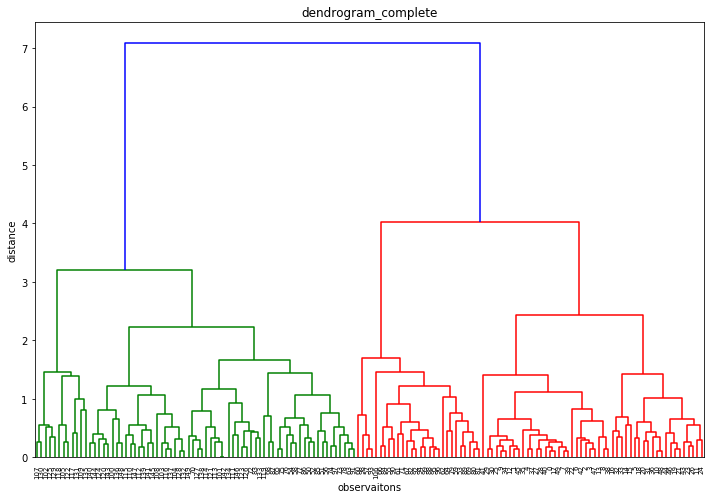

In [24]:
hc_complete = linkage(X, "complete")

plt.figure(figsize=(12,8))
plt.title("dendrogram_complete")
plt.xlabel("observaitons")
plt.ylabel("distance")
dendrogram(hc_complete, leaf_font_size=7)
plt.show()

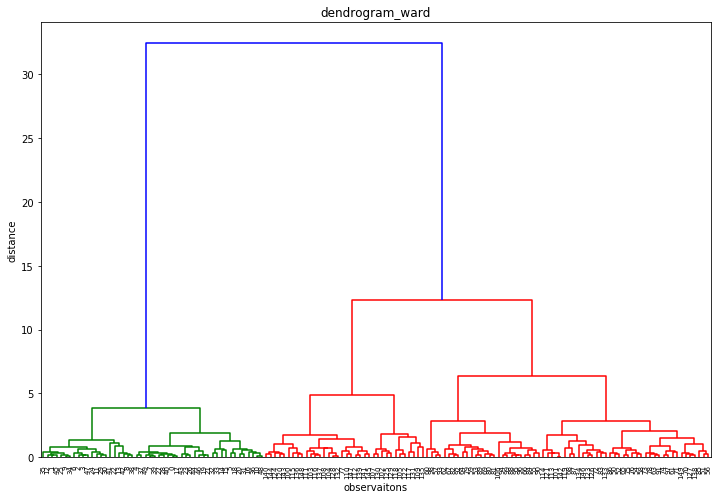

In [25]:
hc_ward = linkage(X, "ward")

plt.figure(figsize=(12,8))
plt.title("dendrogram_ward")
plt.xlabel("observaitons")
plt.ylabel("distance")
dendrogram(hc_ward, leaf_font_size=7)
plt.show()

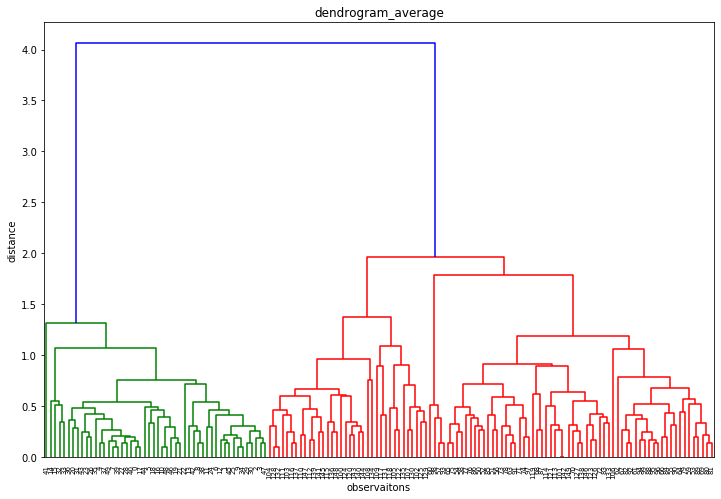

In [27]:
hc_average = linkage(X, "average")

plt.figure(figsize=(12,8))
plt.title("dendrogram_average")
plt.xlabel("observaitons")
plt.ylabel("distance")
dendrogram(hc_average, leaf_font_size=7)
plt.show()

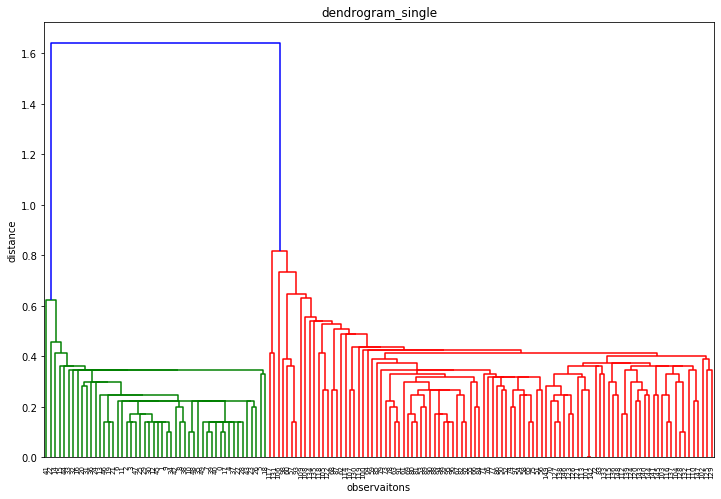

In [28]:
hc_single = linkage(X, "single")

plt.figure(figsize=(12,8))
plt.title("dendrogram_single")
plt.xlabel("observaitons")
plt.ylabel("distance")
dendrogram(hc_single, leaf_font_size=7)
plt.show()

In [29]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
model = AgglomerativeClustering(n_clusters=3, linkage="ward")
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [34]:
clusters = model.labels_

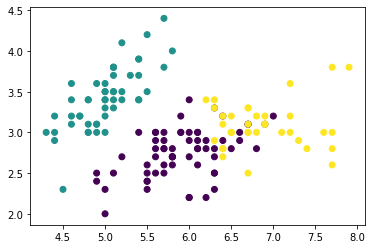

In [33]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=model.labels_)

In [35]:
df["predicted_clusters"] = clusters

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [39]:
ct = pd.crosstab(df.predicted_clusters, df.species)
ct

species,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [43]:
df.species.map({"setosa":1, "versicolor":0, "virginica":2})

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [45]:
df.species.replace({"setosa":1, "versicolor":0, "virginica":2})

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [46]:
df["original"] = df.species.replace({"setosa":1, "versicolor":0, "virginica":2})

In [47]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original
24,4.8,3.4,1.9,0.2,setosa,1,1
40,5.0,3.5,1.3,0.3,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1
65,6.7,3.1,4.4,1.4,versicolor,0,0
66,5.6,3.0,4.5,1.5,versicolor,0,0
30,4.8,3.1,1.6,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
148,6.2,3.4,5.4,2.3,virginica,2,2
132,6.4,2.8,5.6,2.2,virginica,2,2


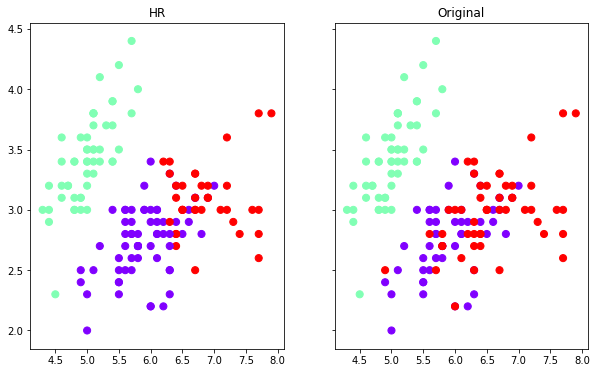

In [48]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 50, cmap = "rainbow")
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original, s = 50, cmap = "rainbow")

In [49]:
from sklearn.metrics import silhouette_samples, silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(X, model.labels_)}')

Silhouette Score(n=3): 0.5543236611296424


In [52]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707745